<img src='./logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' 
height='' alt='' />
<center>**Bachelor of Ecole Polytechnique**</center>
<center>MAA307 Final Project</center>





# Convex Optimization and Optimal Control

&nbsp;

<center> <b>Abdel-Kader KABA</b> </center>


## Table of Contents

- [Part A](#pta)
    - [1. Question 1](#q1a)
    - [2. Question 2](#q2a)
- [Part B](#ptb)
    - [1. Question 1](#q1b)
    - [2. Question 2](#q2b)
    - [3. Question 3](#q3b)
    - [4. Question 4](#q4b)
- [Part C](#ptc)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.patches as mpatches
import sklearn.datasets as skd

# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./custom3.css").read()
    return HTML(styles)
css_styling()

<a id="pta"></a>
## Part A : Optimization with equality constraints

<a id="q1a"></a>
### Question 1

In [11]:
def uzawa(matA,matC,vectb,vectd,tau,tol,m,n):
    max_iterations = 1000
    lamb = np.zeros(m)
    x = np.ones(n)
    x_list = [x]
    dist = 1
    dist_list = []
    i = 0
    while i < max_iterations and dist > tol :
        #import ipdb; ipdb.set_trace()
        x_next = np.matmul(np.linalg.inv(matA),(vectb-np.matmul(matC.T,lamb)))
        x_list.append(x_next)
        dist = np.linalg.norm(x_list[-1]-x_list[-2])
        dist_list.append(dist)
        lamb += tau*(np.matmul(matC,x_next)-vectd)
        i += 1
    print("number of iterations",i)
    return dist_list,i,x_list

<div  markdown=0 class="Algo">
We choose two stepsizes, one such that it is smaller than 2mA/mC and another which is bigger and we show that the algo doesn't converge in the second case.
Also we show that there is a \lambda s.t the system holds.

In [12]:
##First example with A = identity, C random and a tau that is smaller than bound 
m = 2
n = 3

A = np.identity(n)
C = np.random.random((m,n))
w1,v1 = np.linalg.eig(A)
w2,v2 = np.linalg.eig(np.matmul(C.T,C))

In [171]:
#let's define our set of examples 
b_ex = np.random.rand(5,n)
d_ex = np.random.rand(5,m)

A_ex = [skd.make_spd_matrix(n) for i in range(0,5)] #generating random pos def matrix i.e eigenvalue > 0


In [181]:
bound1 = 2*min(w1)/max(w2)
tau1 = bound/2

bound12 = 2*min(np.linalg.eig(A_ex[0])[0])/max(np.linalg.eig(np.matmul(C.T,C))[0])
tau12 = bound12/2

bound13 = 2*min(np.linalg.eig(A_ex[1])[0])/max(np.linalg.eig(np.matmul(C.T,C))[0])
tau13 = bound13/2

res1 = uzawa(A,C,b_ex[0],d_ex[0],tau1,0.0001,m,n) #result when A = I

res12 = uzawa(A_ex[0],C,b_ex[1],d_ex[1],tau12,0.0001,m,n) #A is random

res13 = uzawa(A_ex[1],C,b_ex[2],d_ex[2],tau13,0.0001,m,n) #A is random


number of iterations 22
number of iterations 51
number of iterations 34


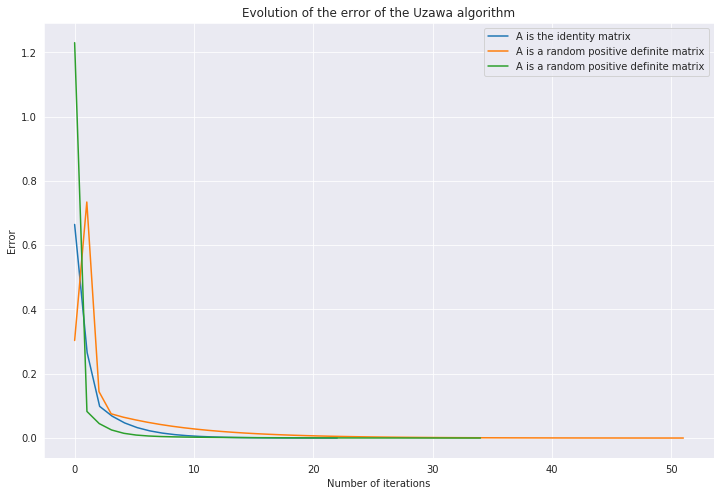

In [182]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,res1[1],len(res1[0])),res1[0],label="A is the identity matrix")
plt.plot(np.linspace(0,res12[1],len(res12[0])),res12[0],label="A is a random positive definite matrix")
plt.plot(np.linspace(0,res13[1],len(res13[0])),res13[0],label="A is a random positive definite matrix")
plt.title("Evolution of the error of the Uzawa algorithm")
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.legend()
plt.show()

<div  markdown=0 class="Algo">
Now we plot the error when the tau is higher than the bound

number of iterations 1000


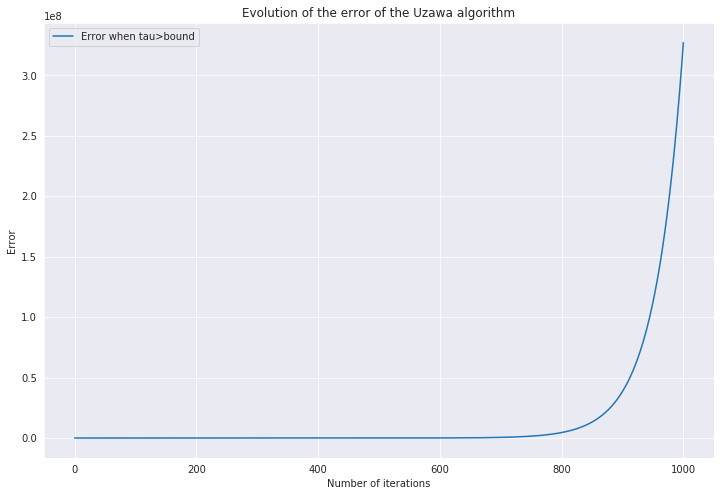

In [90]:
tau2 = bound+0.02
res2 = uzawa(A,C,b_ex[0],d_ex[0],tau2,0.001,m,n)
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,res2[1],len(res2[0])),res2[0],label="Error when tau>bound")
plt.title("Evolution of the error of the Uzawa algorithm")
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.legend()
plt.show()

<div  markdown=0 class="Algo">
We observe that Uzawa algorithm does not converge in that case

<a id="q2a"></a>
### Question 2

<div  markdown=0 class="Algo">
We implement the augmented Lagrangian from question 3 ex 6.8 with the same initialization and stopping criterion as for Uzawa

In [193]:
##augmented lagrangian

def alagrangian(matA,matC,vectb,vectd,beta,tol,m,n):
    max_iterations = 1000
    lamb = np.zeros(m)
    x = np.ones(n)
    x_list = [x]
    dist = 1
    dist_list = []
    i = 0
    while i < max_iterations and dist > tol :
        #import ipdb; ipdb.set_trace()
        addi = matA+beta*np.matmul(matC.T,matC)
        fact = vectb-np.matmul(matC.T,lamb)+beta*np.matmul(matC.T,vectd)
        x_next = np.matmul(np.linalg.inv(addi),fact)
        x_list.append(x_next)
        dist = np.linalg.norm(x_list[-1]-x_list[-2])
        dist_list.append(dist)
        lamb += beta*(np.matmul(matC,x_next)-vectd)
        i += 1
    print("number of iterations",i)
    return dist_list,i,x_list

In [194]:
alan1 = alagrangian(A,C,b_ex[0],d_ex[0],1,0.0001,m,n) #result when A = I

alan12 = alagrangian(A_ex[0],C,b_ex[1],d_ex[1],1,0.0001,m,n) #A is random

alan13 = alagrangian(A_ex[1],C,b_ex[2],d_ex[2],1,0.0001,m,n) #A is random


number of iterations 26
number of iterations 26
number of iterations 15


<div  markdown=0 class="Algo">
We compare the convergence of the Augmented Lagragian with that of the Uzawa algorithm for $\beta = 1$

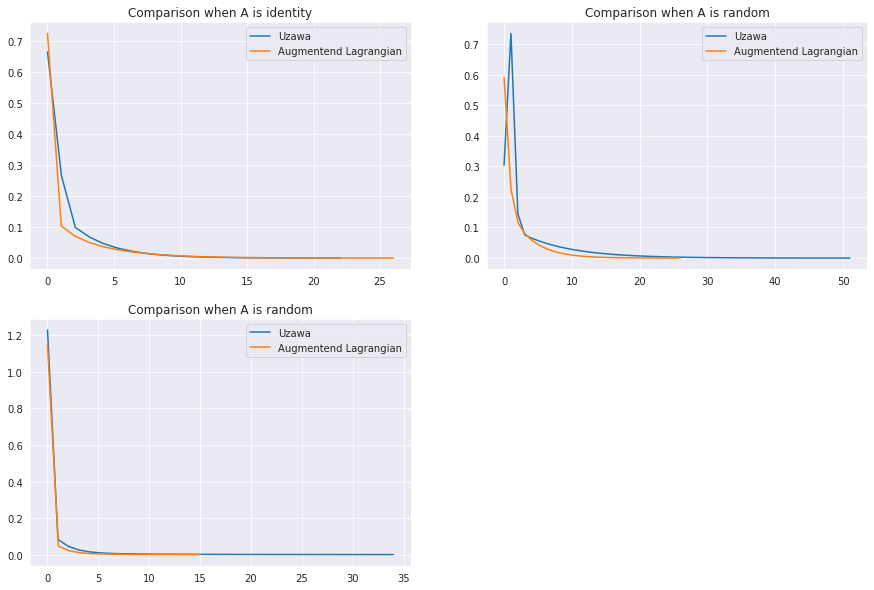

In [223]:
#plt.figure(figsize=(15,15))

fig = plt.figure(figsize=(15,10))
axs0 = fig.add_subplot(221)
axs1 = fig.add_subplot(222)
axs2 = fig.add_subplot(223)
axs0.set_title('Comparison when A is identity')
axs1.set_title('Comparison when A is random')
axs2.set_title('Comparison when A is random')
axs0.plot(np.linspace(0,res1[1],len(res1[0])),res1[0],label="Uzawa")
axs0.plot(np.linspace(0,alan1[1],len(alan1[0])),alan1[0],label = "Augmentend Lagrangian")
axs0.legend()
axs1.plot(np.linspace(0,res12[1],len(res12[0])),res12[0],label="Uzawa")
axs1.plot(np.linspace(0,alan12[1],len(alan12[0])),alan12[0],label = "Augmentend Lagrangian")
axs1.legend()
axs2.plot(np.linspace(0,res13[1],len(res13[0])),res13[0],label="Uzawa")
axs2.plot(np.linspace(0,alan13[1],len(alan13[0])),alan13[0],label = "Augmentend Lagrangian")
axs2.legend()
plt.show()

<div  markdown=0 class="Algo">
We observe that Augmented Lagrangian algorithm converges faster than Uzawa Algorithm

<div  markdown=0 class="Algo">
Now let's increase the augmentation parameter and see how the augmented lagrangian behaves. We will use $A$ equal identity.

In [235]:
betas = np.linspace(0,3,10)
alan_list = [alagrangian(A,C,b_ex[0],d_ex[0],elmnt,0.0001,m,n) for elmnt in betas]

number of iterations 2
number of iterations 60
number of iterations 35
number of iterations 26
number of iterations 21
number of iterations 18
number of iterations 16
number of iterations 15
number of iterations 14
number of iterations 13


In [236]:
betas

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ])

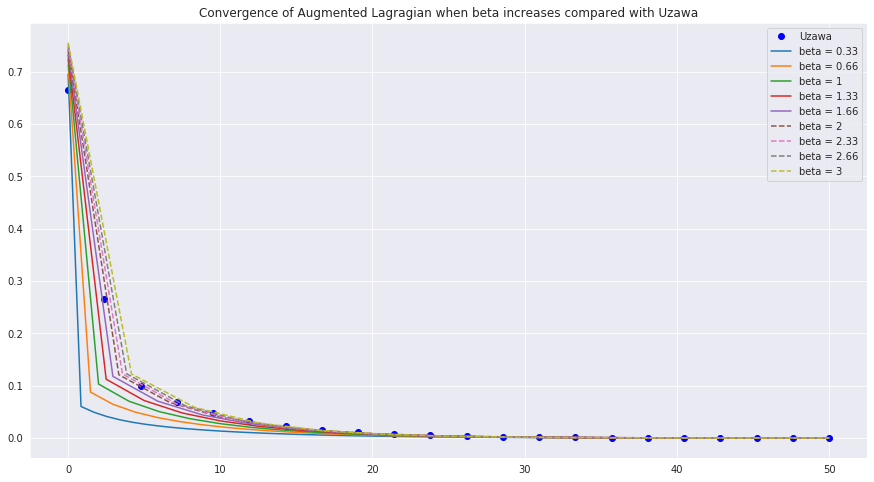

In [239]:
plt.figure(figsize=(15,8))
plt.plot(np.linspace(0,50,len(res1[0])),res1[0],'bo',label='Uzawa')
#plt.plot(np.linspace(0,50,len(alan_list[0][0])),alan_list[0][0],'--',label='beta = 0')
plt.plot(np.linspace(0,50,len(alan_list[1][0])),alan_list[1][0],label='beta = 0.33')
plt.plot(np.linspace(0,50,len(alan_list[2][0])),alan_list[2][0],label='beta = 0.66')
plt.plot(np.linspace(0,50,len(alan_list[3][0])),alan_list[3][0],label='beta = 1')
plt.plot(np.linspace(0,50,len(alan_list[4][0])),alan_list[4][0],label='beta = 1.33')
plt.plot(np.linspace(0,50,len(alan_list[5][0])),alan_list[5][0],label='beta = 1.66')
plt.plot(np.linspace(0,50,len(alan_list[6][0])),alan_list[6][0],'--',label='beta = 2')
plt.plot(np.linspace(0,50,len(alan_list[7][0])),alan_list[7][0],'--',label='beta = 2.33')
plt.plot(np.linspace(0,50,len(alan_list[8][0])),alan_list[8][0],'--',label='beta = 2.66')
plt.plot(np.linspace(0,50,len(alan_list[9][0])),alan_list[9][0],'--',label='beta = 3')
plt.legend()
plt.title('Convergence of Augmented Lagragian when beta increases compared with Uzawa')
plt.show()

<div  markdown=0 class="Algo">
Now we try with the example where A is random before we draw our conclusion

In [240]:
alan_list2 = [alagrangian(A_ex[0],C,b_ex[1],d_ex[1],elmnt,0.0001,m,n) for elmnt in betas]

number of iterations 2
number of iterations 59
number of iterations 35
number of iterations 26
number of iterations 21
number of iterations 18
number of iterations 16
number of iterations 15
number of iterations 13
number of iterations 13


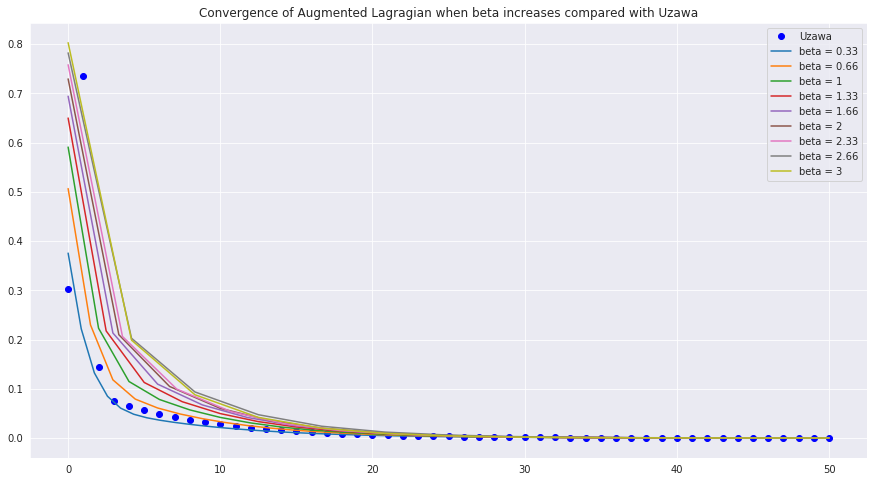

In [242]:
plt.figure(figsize=(15,8))
plt.plot(np.linspace(0,50,len(res12[0])),res12[0],'bo',label='Uzawa')
#plt.plot(np.linspace(0,50,len(alan_list[0][0])),alan_list[0][0],'--',label='beta = 0')
plt.plot(np.linspace(0,50,len(alan_list2[1][0])),alan_list2[1][0],label='beta = 0.33')
plt.plot(np.linspace(0,50,len(alan_list2[2][0])),alan_list2[2][0],label='beta = 0.66')
plt.plot(np.linspace(0,50,len(alan_list2[3][0])),alan_list2[3][0],label='beta = 1')
plt.plot(np.linspace(0,50,len(alan_list2[4][0])),alan_list2[4][0],label='beta = 1.33')
plt.plot(np.linspace(0,50,len(alan_list2[5][0])),alan_list2[5][0],label='beta = 1.66')
plt.plot(np.linspace(0,50,len(alan_list2[6][0])),alan_list2[6][0],label='beta = 2')
plt.plot(np.linspace(0,50,len(alan_list2[7][0])),alan_list2[7][0],label='beta = 2.33')
plt.plot(np.linspace(0,50,len(alan_list2[8][0])),alan_list2[8][0],label='beta = 2.66')
plt.plot(np.linspace(0,50,len(alan_list2[9][0])),alan_list2[9][0],label='beta = 3')
plt.legend()
plt.title('Convergence of Augmented Lagragian when beta increases compared with Uzawa')
plt.show()

<div  markdown=0 class="Algo">
When beta increases, we see that the algorithm is slower to converge. It is expected because we know that as beta gets bigger the linear system becomes harder to solve by an iterative method

<a id='ptb'></a>

## Part B : optimization with inequality constraints

<a id='q1b'></a>

### Question 1

In [13]:
def uzawa2(matA,matC,vectb,vectd,tau,tol,m,n):
    max_iterations = 1000
    mu = np.zeros(m)
    x = np.ones(n)
    x_list = [x]
    dist = 1
    dist_list = []
    i = 0
    while i < max_iterations and dist > tol :
        #import ipdb; ipdb.set_trace()
        x_next = np.matmul(np.linalg.inv(matA),(vectb-np.matmul(matC.T,mu)))
        x_list.append(x_next)
        dist = np.linalg.norm(x_list[-1]-x_list[-2])
        dist_list.append(dist)
        mu = np.maximum(mu+tau*(np.matmul(matC,x_next)-vectd),0)
        i += 1
    print("number of iterations",i)
    return dist_list,i,x_list

<div  markdown=0 class="Algo">
We test our algorithm with $A = I$,$C = -I$ and $d = 0$ 

In [281]:
Ci = -np.identity(n)

In [284]:
tau21 = min(np.linalg.eig(A)[0])/max(np.linalg.eig(np.matmul(Ci.T,Ci))[0])

res21 = uzawa2(A,Ci,b_ex[0],0,tau21,0.001,n,n)
res21[0][-1]

number of iterations 2


0.0

In [285]:
res22 = uzawa2(A_ex[0],C,b_ex[1],d_ex[1],tau12,0.001,m,n)

res23 = uzawa2(A_ex[1],C,b_ex[2],d_ex[2],tau13,0.001,m,n)

number of iterations 12
number of iterations 21


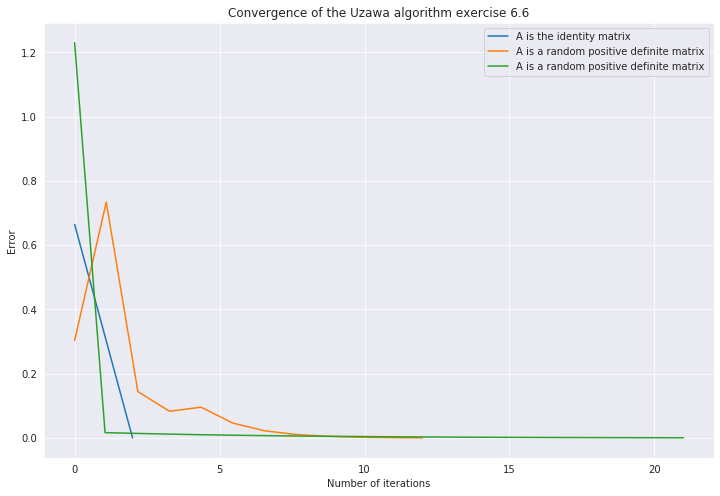

In [287]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,res21[1],len(res21[0])),res21[0],label="A is the identity matrix")
plt.plot(np.linspace(0,res22[1],len(res22[0])),res22[0],label="A is a random positive definite matrix")
plt.plot(np.linspace(0,res23[1],len(res23[0])),res23[0],label="A is a random positive definite matrix")
plt.title("Convergence of the Uzawa algorithm exercise 6.6")
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.legend()
plt.show()

<a id='q2b'></a>

### Question 2

<div  markdown=0 class="Algo">
We implement the gradient method with projection

In [294]:
def gradient_method(matA,vectb,tau,tol,m,n):
    max_iterations = 1000
    x = np.zeros(n)
    x_list = [x]
    dist = 1
    dist_list = []
    i = 0
    while i < max_iterations and dist > tol :
        x_next = np.maximum(np.matmul(np.identity(n)-tau*matA,x)+tau*vectb,0)
        x_list.append(x_next)
        dist = np.linalg.norm(x_list[-1]-x_list[-2])
        dist_list.append(dist)
        x = x_next
        i += 1
    print("number of iterations",i)
    return dist_list,i,x_list

In [297]:
tau31 = 1/2*max(w1)
res31 = gradient_method(A,b_ex[0],tau31,0.001,m,n)

#tau32 = 1/2*max(np.linalg.eig(A_ex[0])[0])
#res32 = gradient_method(A_ex[0],b_ex[1],tau32,0.001,m,n)

#tau33 = 1/2*max(np.linalg.eig(A_ex[1])[0])
#res33 = gradient_method(A_ex[1],b_ex[2],tau33,0.001,m,n)

number of iterations 11


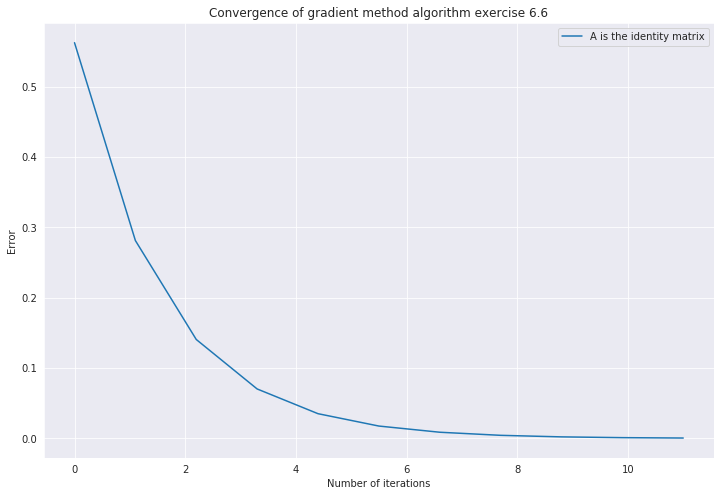

In [298]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,res31[1],len(res31[0])),res31[0],label="A is the identity matrix")
plt.title("Convergence of gradient method algorithm exercise 6.6")
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.legend()
plt.show()

<div  markdown=0 class="Algo">
We see that the algorithm converges. It converges faster than Uzawa's algorithm

<a id='q3b'></a>

### Question 3

<div  markdown=0 class="Algo">
We want to apply Uzawa's algorithm to compute the projection onto the set $K$. The idea is to minimize the squared distance of a point $x \in \mathbb{R}^n$ to a point $y \in K$. It is an optimization problem with inequality constraits since $u_{i} \leq u_{i+1}$.  

In [303]:
#construct matrix C

def zeronemat(n):
    mat = np.zeros((n-1,n))
    for i in range(n-1):
        for j in range(n):
            if i == j:
                mat[i][j] = 1
            mat[i][i+1] = -1
    return mat

In [307]:
testm = zeronemat(n)

In [308]:
tau41 = min(np.linalg.eig(A)[0])/max(np.linalg.eig(np.matmul(testm.T,testm))[0])
btest = -2*np.random.rand(n)
res41 = uzawa2(A,testm,btest,0,tau41,0.001,n-1,n)

number of iterations 13


In [317]:
##Plot norm of the vectors in res41

xs_list = res41[2]
norm_list = [np.linalg.norm(elmt) for elmt in xs_list]

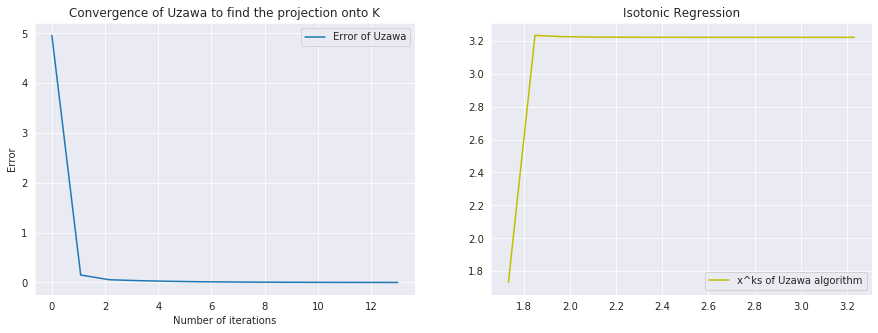

In [336]:
fig = plt.figure(figsize=(15,5))
axs11 = fig.add_subplot(121)
axs12 = fig.add_subplot(122)
axs11.plot(np.linspace(0,res41[1],len(res41[0])),res41[0],label="Error of Uzawa")
axs11.set_title("Convergence of Uzawa to find the projection onto K")
axs11.set_xlabel("Number of iterations")
axs11.set_ylabel("Error")
axs11.legend()
axs12.plot(np.linspace(min(norm_list),max(norm_list),len(norm_list)),norm_list,'y',label='x^ks of Uzawa algorithm')
axs12.set_title('Isotonic Regression')
axs12.legend()
plt.show()

In [311]:
print("The projection onto K is : ", res41[2][-1])

The projection onto K is :  [-1.85800567 -1.8593657  -1.86072574]


<a id='q4b'></a>

### Question 4

<div  markdown=0 class="Algo">
Now we want to compute the projection onto a different set $K' = \{(u_1,...u_n) \in \mathbb{R}^{n}, u_i \leq \frac{1}{2}(u_{i-1}+u_{i+1})\}$

In [14]:
def halfonemat(n):
    mat = np.zeros((n-2,n))
    for i in range(n-2):
        for j in range(n):
            mat[i][i] = -0.5
            mat[i][i+1] = 1
            mat[i][i+2] = -0.5
    return mat

In [15]:
testm2 = halfonemat(5)

In [25]:
tau51 = min(np.linalg.eig(np.identity(5))[0])/max(np.linalg.eig(np.matmul(testm2.T,testm2))[0])
btest2 = -2*np.random.rand(5)
res51 = uzawa2(np.identity(5),testm2,btest2,0,tau51,0.001,3,5)

number of iterations 28


In [26]:
xs_list2 = res51[2]
norm_list2 = [np.linalg.norm(elmt) for elmt in xs_list2]

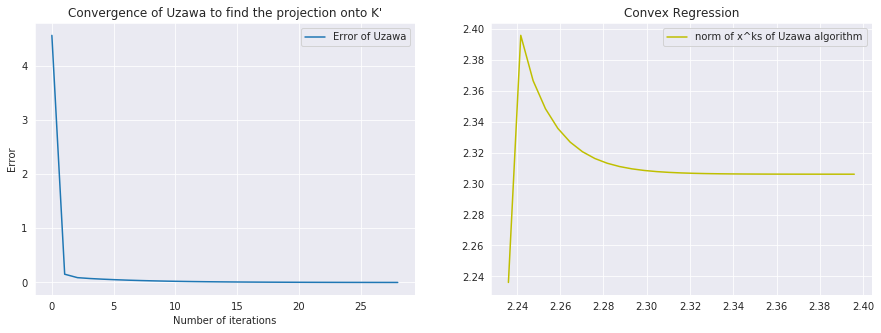

In [27]:
fig = plt.figure(figsize=(15,5))
axs21 = fig.add_subplot(121)
axs22 = fig.add_subplot(122)
axs21.plot(np.linspace(0,res51[1],len(res51[0])),res51[0],label="Error of Uzawa")
axs21.set_title("Convergence of Uzawa to find the projection onto K'")
axs21.set_xlabel("Number of iterations")
axs21.set_ylabel("Error")
axs21.legend()
axs22.plot(np.linspace(min(norm_list2),max(norm_list2),len(norm_list2)),norm_list2,'y',label='norm of x^ks of Uzawa algorithm')
axs22.set_title('Convex Regression')
axs22.legend()
plt.show()

In [28]:
print("The projection onto K' is : ", res51[2][-1])

The projection onto K' is :  [-1.0710692  -1.33716733 -1.10097716 -0.8697952  -0.64362144]


<a id='ptc'></a>

## Part C : Nonsmooth optimization

In [14]:
def subgradient(tol,n):
    max_iterations = 1200
    x = np.random.rand(n)
    points = [np.random.rand(n) for i in range(n)]
    x_list = [x]
    dist = 1
    dist_list = []
    i = 1
    while i < max_iterations and dist > tol :
        tau = 1/i
        norms = np.array([np.linalg.norm(x-elmt)**2 for elmt in points])
        r = x - points[norms.argmax()]
        x_next = x - tau*(r/np.linalg.norm(r))
        x_list.append(x_next)
        dist = np.linalg.norm(x_list[-1]-x_list[-2])
        dist_list.append(dist)
        x = x_next
        i += 1
    print("number of iterations",i)
    return dist_list,i,x_list,points

In [15]:
res61 = subgradient(0.001,2)

number of iterations 1001


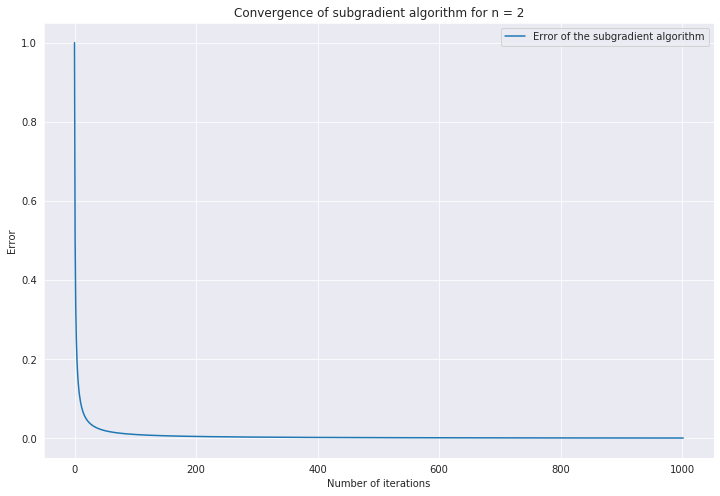

In [13]:
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,res61[1],len(res61[0])),res61[0],label="Error of the subgradient algorithm")
plt.title("Convergence of subgradient algorithm for n = 2")
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.legend()
plt.show()

In [24]:
plt.figure(figsize=(12,8))
l = []
for el in res61[3]:
    l.append(el)
l.append(res61[2][-1])
l

[array([0.13911283, 0.88319212]),
 array([0.10179604, 0.57139942]),
 array([0.12045456, 0.72729677])]

<Figure size 864x576 with 0 Axes>

In [26]:
x = []
y = []
for elmt in l:
    x.append(elmt[0])
    y.append(elmt[1])
x,y

([0.1391128346655255, 0.10179604022370337, 0.12045455639446058],
 [0.8831921246581074, 0.5713994245352628, 0.7272967684573391])

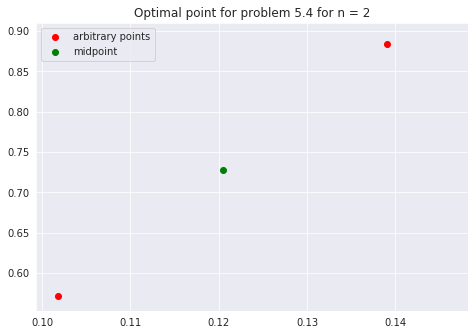

Coordinates of the points shown above :  [array([0.13911283, 0.88319212]), array([0.10179604, 0.57139942]), array([0.12045456, 0.72729677])]


In [49]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x[0],y[0],c='red',label='arbitrary points')
ax.scatter(x[2],y[2],c='green',label='midpoint')
ax.scatter(x[1],y[1],c='red')
ax.legend()
plt.title('Optimal point for problem 5.4 for n = 2')
plt.show()
print('Coordinates of the points shown above : ',l)

<div  markdown=0 class="Algo">
We observe on the graph above that the $\text{optimal point found with the subgradient algorithm}$ has indeed the properties demonstrated in 5.4 : It is in the convex hull of $x_1,x_2$ and it is equidistant to $x_1,x_2$